## Linear models make a prediction using a linear function of the input features.

### Linear models for regression:
For regression, the general prediction formula for a linear model looks as follows:

$$
\hat{y} = w_0\,x_0 + w_1\,x_1 + \dots + w_p\,x_p + b
$$

Here, \(x_0\) to \(x_p\) denote the features (in this example, the number of features is \(p\)) of a single data point. The parameters \(w\) (weights) and \(b\) (bias) are learned during training, and ŷ is the model’s prediction.

For a dataset with a single feature, the formula simplifies to:

$$
\hat{y} = w_0\,x_0 + b
$$

In this case, \(w_0\) is the slope and \(b\) is the y‑axis offset. For multiple features, each \(w_i\) represents the slope along the \(i\)-th feature axis, so you can think of the predicted response as a (possibly negative) weighted sum of the input features.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import mglearn

X, y = mglearn.datasets.make_wave(n_samples=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [20]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 1) (25, 1) (75,) (25,)


<strong>lr.coef_</strong>:
This is the coefficient(s) (also called weights) of the features in the model.<br>

It tells you how much the target value changes with a unit change in the input feature, assuming all other factors are constant.<br><br><br>

<strong>lr.intercept_</strong>:

This is the bias term (also called the y-intercept, b in the equation).<br>

It represents the value of y when all x = 0.

In [21]:
print("lr.coef_: ", lr.coef_)               # Weight (slope)
print("lr.intercept_: ", lr.intercept_)     # Bias (intercept)

lr.coef_:  [0.40443939]
lr.intercept_:  -0.02256802817336538


In [22]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))

print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.59
Test set score: 0.66


An **R²** of around 0.66 is not very good, but we can see that the scores on the training
 and test sets are very close together. This means we are likely underfitting, not over
fitting. For this one-dimensional dataset, there is little danger of overfitting, as the
 model is very simple (or restricted). However, with higher-dimensional datasets
 (meaning datasets with a large number of features), linear models become more pow
erful, and there is a higher chance of overfitting. Let’s take a look at how LinearRe
 gression performs on a more complex dataset, like the Boston Housing dataset.
 Remember that this dataset has 506 samples and 105 derived features. First, we load
 the dataset and split it into a training and a test set. Then we build the linear regres
sion model as before

## Overfitting Example

In [23]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


This discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity. One of the most commonly used alternatives to standard linear regression is ridge regression.

##  Ridge regression

Ridge regression is also a linear model for regression, so the formula it uses to make
 predictions is the same one used for ordinary least squares. In ridge regression,
 though, the coefficients (w) are chosen not only so that they predict well on the train
ing data, but also to fit an additional constraint. We also want the magnitude of coef
ficients to be as small as possible; in other words, all entries of w should be close to
 zero. Intuitively, this means each feature should have as little effect on the outcome as
 possible (which translates to having a small slope), while still predicting well. This
 constraint is an example of what is called regularization. Regularization means explic
itly restricting a model to avoid overfitting. The particular kind used by ridge regres
sion is known as L2 regularization.

In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


As you can see, the training set score of Ridge is lower than for LinearRegression,
 while the test set score is higher. This is consistent with our expectation. With linear
 regression, we were overfitting our data. Ridge is a more restricted model, so we are
 less likely to overfit. A less complex model means worse performance on the training
 set, but better generalization. As we are only interested in generalization performance, we should choose the Ridge model over the LinearRegression model. <br><br>


The Ridge model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set. How much importance the
 model places on simplicity versus training set performance can be specified by the
 user, using the alpha parameter. In the previous example, we used the default parameter alpha=1.0. There is no reason why this will give us the best trade-off, though.
 The optimum setting of alpha depends on the particular dataset we are using.
 Increasing alpha forces coefficients to move more toward zero, which decreases
 training set performance but might help generalization.

### 🔧 What Does `alpha` Do?

`alpha` is a number you choose to tell **Ridge Regression** how much it should care about **keeping the model simple**.

- **Big `alpha` (like `10`)** → Keep weights small (simple model), even if predictions aren't perfect.
- **Small `alpha` (like `0.1`)** → Let the model use bigger weights to get better predictions (but might overfit).

---

### 📌 Key Takeaways

| Alpha Value     | What Happens                                         |
|-----------------|------------------------------------------------------|
| **High** (e.g. `10`)  | Model is very simple (small weights), may **underfit** |
| **Low** (e.g. `0.1`)  | Model is more flexible, may **overfit** if too low |
| **Just Right**        | Good balance between learning and simplicity      |

---

### 🧪 How Do We Choose the Best `alpha`?

We **test different values** of `alpha` and see which one gives the **best result on the test set**.


In [25]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


Decreasing alpha allows the coefficients to be less restricted. For very small values of alpha, coefficients are barely restricted at all,
 and we end up with a model that resembles LinearRegression.

In [26]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


We can also get a more qualitative insight into how the alpha parameter changes the
 model by inspecting the coef_ attribute of models with different values of alpha. A
 higher alpha means a more restricted model, so we expect the entries of coef_ to
 have smaller magnitude for a high value of alpha than for a low value of alpha.

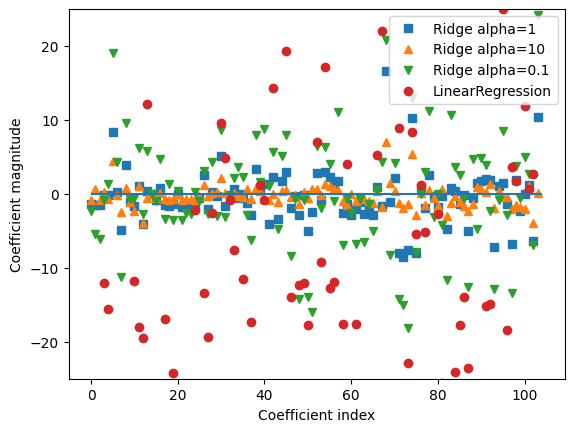

In [27]:
import matplotlib.pyplot as plt

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

 Here, the x-axis enumerates the entries of coef_: x=0 shows the coefficient associated
 with the first feature, x=1 the coefficient associated with the second feature, and so on
 up to x=100. The y-axis shows the numeric values of the corresponding values of the
 coefficients. The main takeaway here is that for alpha=10, the coefficients are mostly
 between around –3 and 3. The coefficients for the Ridge model with alpha=1 are
 somewhat larger. The dots corresponding to alpha=0.1 have larger magnitude still,
 and many of the dots corresponding to linear regression without any regularization
 (which would be alpha=0) are so large they are outside of the chart.

Another way to understand the influence of regularization is to fix a value of alpha
 but vary the amount of training data available. We subsampled the
 Boston Housing dataset and evaluated LinearRegression and Ridge(alpha=1) on
 subsets of increasing size (plots that show model performance as a function of dataset
 size are called learning curves)

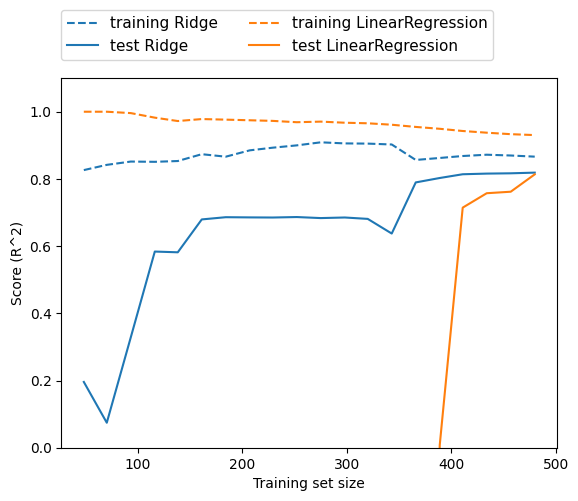

In [28]:
mglearn.plots.plot_ridge_n_samples()

 As one would expect, the training score is higher than the test score for all dataset
 sizes, for both ridge and linear regression. Because ridge is regularized, the training
 score of ridge is lower than the training score for linear regression across the board.
 However, the test score for ridge is better, particularly for small subsets of the data.
 For less than 400 data points, linear regression is not able to learn anything. As more
 and more data becomes available to the model, both models improve, and linear
 regression catches up with ridge in the end. The lesson here is that with enough train
ing data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance (the fact that this happens here
 when using the full dataset is just by chance). Another interesting aspect here is the decrease in training performance for linear regression. If more data
 is added, it becomes harder for a model to overfit, or memorize the data.